<a href="https://colab.research.google.com/github/sai-teja-ponugoti/ECE-657A-Machine-Learning/blob/master/Assignment3/A3_Part1_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing required libraries**

In [0]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.patheffects as PathEffects
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.model_selection import GridSearchCV
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
# %matplotlib inline

**Importing Dataset directly from kaggle and unzipping the files**

In [0]:
from google.colab import files
import io
uploaded = files.upload()

!pip install -q kaggle

# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c ece-657a-w20-asg3-part-1
!unzip train.csv.zip
!unzip testX.csv.zip

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 71 Apr 22 23:50 kaggle.json
  0% 0.00/180 [00:00<?, ?B/s]
100% 180/180 [00:00<00:00, 156kB/s]
 89% 5.00M/5.59M [00:00<00:00, 24.8MB/s]
100% 5.59M/5.59M [00:00<00:00, 27.4MB/s]
 56% 19.0M/33.7M [00:00<00:00, 28.6MB/s]
100% 33.7M/33.7M [00:00<00:00, 62.5MB/s]
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  testX.csv.zip
  inflating: testX.csv               


**Reading data into numpy arrays and converting into required formats**

In [0]:
data_raw = pd.read_csv('train.csv')
# data_raw.head()

# selecting only required number of observations
data_sample = data_raw.iloc[0:60000]
data = data_sample.iloc[:,2:]
labels = data_sample.iloc[:,1]
# print(data.shape)
# print(data.head())
# print(labels.shape)

testX = pd.read_csv('testX.csv')
testX.head()
test = testX.iloc[:,1:]
# print(test.shape)
# test.head()

**Exploring PCA**

In [0]:
StScl = StandardScaler().fit(data)
data_std = StScl.fit_transform(data)
test_std = StScl.transform(test)

In [0]:
pca = PCA().fit(data_std)
print(pca.explained_variance_ratio_.shape)

(784,)


Heatmap for first two components of PCA

Text(0.5, 0.98, '2-Component PCA')

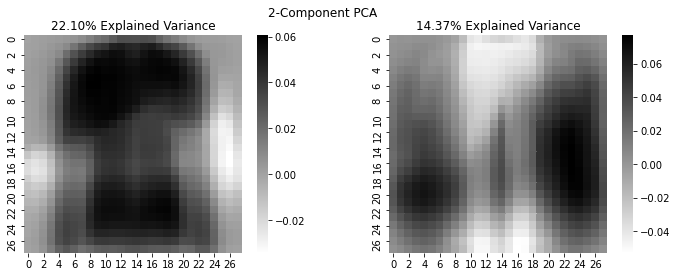

In [0]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[1], cmap='gray_r')
axarr[0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[0].set_aspect('equal')
axarr[1].set_aspect('equal')

plt.suptitle('2-Component PCA')

Plotting a graph to understand explained variance for PCA components

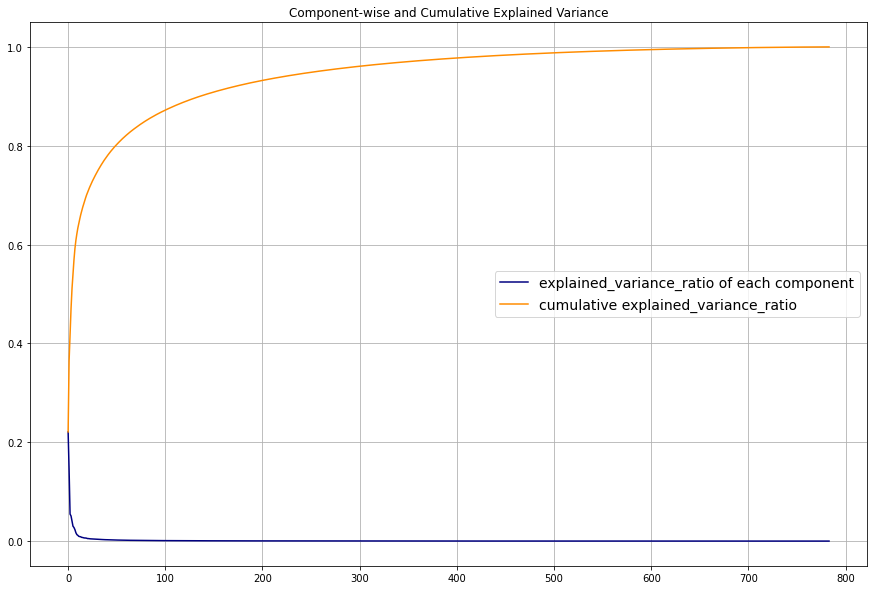

In [0]:
data_pca = pca.transform(data_std)
plt.figure(figsize=(15,10))
plt.plot(pca.explained_variance_ratio_,color='navy',label='explained_variance_ratio of each component')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='darkorange',label='cumulative explained_variance_ratio')
plt.title("Component-wise and Cumulative Explained Variance")
plt.legend(loc="center right",prop={'size': 14})
plt.grid()
plt.show()


In [0]:

def scatter_plot(x, colors,method):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    sc = ax.scatter(x[:,0], x[:,1], c=palette[colors.astype(np.int)])
    ax.set_title(method)
    

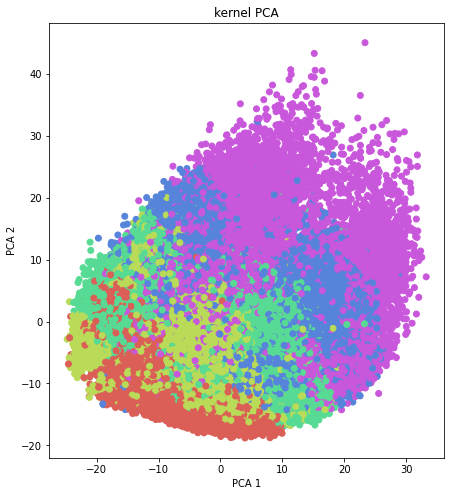

In [0]:
data_pca = pca.transform(data_std)
test_pca = pca.transform(test_std)
scatter_plot(data_pca[:,0:2], labels,"kernel PCA")

In [0]:
# from sklearn.manifold import TSNE
# time_start = time.time()
# sne_data = TSNE(n_components=2).fit_transform(data)
# taken_t.append(["t-SNE",time.time()-time_start])
# scatter_plot(sne_data, labels,"Isomap")

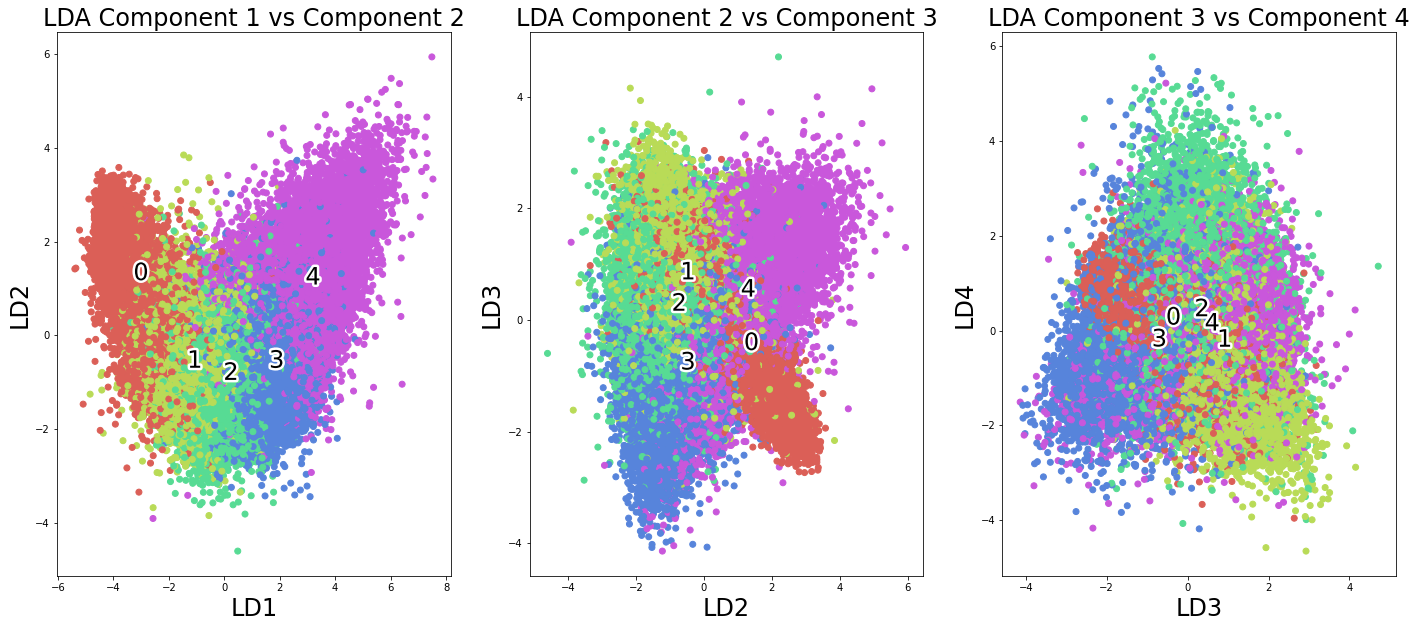

In [0]:
def scatter_plot_lda(x, colors,method,ax,xlab,ylab):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    sc = ax.scatter(x[:,0], x[:,1], c=palette[colors.astype(np.int)])
    ax.set_title(method,fontsize=24)
    plt.xlabel(xlab,fontsize=24)
    plt.ylabel(ylab,fontsize=24)
    # add the labels for each digit corresponding to the label

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
lda = LinearDiscriminantAnalysis(n_components=None)
lda.fit(data_std,labels)

#transforming both train and test data using fitted model
X_train_lda = lda.transform(data_std)

# print(X_train_lda.shape)



# f = plt.figure(figsize=(8, 8))
fig = plt.figure(figsize=(24, 10))
for i in range(0,3):
    ax = plt.subplot(1,3,i+1)
    scatter_plot_lda(X_train_lda[:,[i,i+1]],labels,"LDA Component "+str(i+1)+" vs Component "+str(i+2),ax,"LD"+str(i+1),"LD"+str(i+2))

In [0]:
data_pca_subset = data_pca[:,0:120]
print(data_pca_subset.shape)

(60000, 120)


# **Implementing KNN**

In [0]:
# splitting the data into train and test
# selecting only a subset of sample for quicker grid search
taken_t = []
k = [6,11,16,21,26,31]

train_x,test_x,train_y,test_y=train_test_split(data_std[0:10000],labels[0:10000],test_size=0.2,random_state=42)

# print(train_x.shape)
# print(train_y.shape)

# checking how much time KNN takes to train and test a subset 0f 16k and 4k of orginal data set
# using default KNN without any tuning
time_start = time.time()
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(train_x, train_y)
time_end = time.time()
scores=cross_val_score(knn, train_x ,train_y, cv=10)

taken_t.append(["KNN without tuning ",time_end -time_start])
print("Validation set mean accuracy score for C= {0} with all features is {1}".format(13,scores.mean()))
print("time taken for training KNN for all features is {0}".format(time_end -time_start))

Validation set mean accuracy score for C= 13 with all features is 0.7843749999999999
time taken for training KNN for all features is 0.8168740272521973


Validation set mean accuracy score for n = 13 is 0.7843749999999999

time taken for validation acuuracy 102.36984324455261

In [0]:
#testing how much time KNN will take the predict the output
time_start = time.time()
y_pred = knn.predict(test_x)
time_end = time.time()
accscore = accuracy_score(test_y, y_pred)
print("test set accuracy score for C= {0} with all features is {1}".format(13,accscore))
print("time taken for predicting KNN for all features is {0}".format(time_end -time_start))

test set accuracy score for C= 13 with all features is 0.7955
time taken for predicting KNN for all features is 31.2607102394104


test set accuracy score for C= 13 with all features is 0.7955
time taken for predicting KNN for all features is 31.2607102394104

Training and testing with PCA transformed data

In [0]:
train_x,test_x,train_y,test_y=train_test_split(data_pca_subset[0:10000],labels[0:10000],test_size=0.2,random_state=42)
taken_t=[]

# time taken by KNN for 120 PCA components
time_start = time.time()
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(train_x, train_y)
time_end = time.time()
scores=cross_val_score(knn, train_x ,train_y, cv=10)

taken_t.append(["KNN without tuning",time_end -time_start])
print("Validation set mean accuracy score for C= {0} with 120 PCA components is {1}".format(13,scores.mean()))
print("time taken for training KNN with 120 PCA components {0}".format(time_end -time_start))

Validation set mean accuracy score for C= 13 with 120 PCA components is 0.8098750000000001
time taken for training KNN with 120 PCA components 0.10416555404663086


In [0]:
#testing how much time KNN will take the predict the output
time_start = time.time()
y_pred = knn.predict(test_x)
time_end = time.time()
accscore = accuracy_score(test_y, y_pred)
print("test set accuracy score for C= {0} with 120 PCA components is {1}".format(13,accscore))
print("time taken for predicting output with 120 PCA components {0}".format(time_end -time_start))

test set accuracy score for C= 13 with 120 PCA components is 0.812
time taken for predicting output with 120 PCA components 2.2381491661071777


**Parameter tuning for KNN ,using grid search**

In [0]:
# define the parameter values that should be searched
k_range = list(range(11,71,15))

weight_options = ['uniform', 'distance']

param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

train_x,test_x,train_y,test_y=train_test_split(data_pca_subset[0:30000],labels[0:30000],test_size=0.2,random_state=42)

{'n_neighbors': [11, 26, 41, 56], 'weights': ['uniform', 'distance']}


In [0]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(train_x, train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=13, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [11, 26, 41, 56],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')
{'n_neighbors': 11, 'weights': 'distance'}
0.8387500000000001


**Training and testing accuracy based on best parameters**

In [0]:
train_x,test_x,train_y,test_y=train_test_split(data_pca_subset,labels,test_size=0.1,random_state=42)

time_start = time.time()
knn = KNeighborsClassifier(n_neighbors=11,weights='distance')
knn.fit(train_x, train_y)
time_end = time.time()
scores=cross_val_score(knn, train_x ,train_y, cv=10) 

print("Validation set mean accuracy score for C= {0} with 120 PCA components is {1}".format(11,scores.mean()))
print("time taken for training KNN with 120 PCA components {0}".format(time_end -time_start))

Validation set mean accuracy score for C= 11 with 120 PCA components is 0.8540740740740741
time taken for training KNN with 120 PCA components 1.1164450645446777


In [0]:
#testing how much time KNN will take the predict the output
time_start = time.time()
y_pred = knn.predict(test_x)
time_end = time.time()
accscore = accuracy_score(test_y, y_pred)
print("test set accuracy score for C= {0} with 120 PCA components is {1}".format(13,accscore))
print("time taken for predicting output with 120 PCA components {0}".format(time_end -time_start))

test set accuracy score for C= 13 with 120 PCA components is 0.858
time taken for predicting output with 120 PCA components 47.24936842918396


**Training with whole dataset and predicting the labels for test data**

In [0]:
time_start = time.time()
knn = KNeighborsClassifier(n_neighbors=11,weights='distance')
knn.fit(data_pca_subset, labels)
time_end = time.time()
print("time taken for predicting output with 120 PCA components {0}".format(time_end -time_start))

time taken for predicting output with 120 PCA components 0.9720001220703125


In [0]:
test_pca = test_pca[:,0:120]
time_start = time.time()
predicted = knn.predict(test_pca)
time_end = time.time()
print(predicted.shape)
print("time taken for predicting output with 120 PCA components {0}".format(time_end -time_start))

(10000,)
time taken for predicting output with 120 PCA components 59.21179127693176


In [0]:
my_submission = pd.DataFrame({'Id': testX.Id, 'Label': predicted})
# you could use any filename. We choose submission here
my_submission.to_csv('KNN SUbmission.csv', index=False)

**Storing and plotting ROC curve for KNN**

In [0]:
y = label_binarize(labels, classes=[0, 1, 2, 3, 4])
n_classes = 5


n_samples, n_features = data_pca_subset[0:60000].shape

print(n_samples)
print(n_features)

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_pca_subset[0:60000],y[0:60000], test_size=.2,
                                                    random_state=42)

unique, counts = np.unique( y, return_counts=True)
dict(zip(unique, counts))

60000
120


{0: 240000, 1: 60000}

In [0]:
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=11,weights='distance'))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [0]:
n_classes = 5
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [0]:
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr[2], tpr[2], lw=lw, label='class - 2 ROC curve (area = %0.2f)' % roc_auc[2],color='navy')
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='class - 1 ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


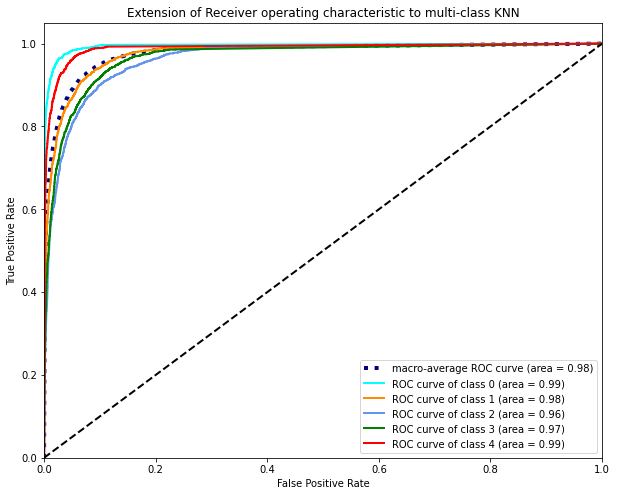

In [0]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,8))
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue' , 'green' ,'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extension of Receiver operating characteristic to multi-class KNN')
plt.legend(loc="lower right")
plt.show()

## **Random Forest**

In [0]:
train_x,test_x,train_y,test_y=train_test_split(data_pca_subset[0:1000],labels[0:1000],test_size=0.2,random_state=42)

depth = [20,30,50,60,None]
#trees values to be used for training
trees=[50,150,200,300]

logloss = []
f1score = []

deatils = []


In [0]:

u = 0;
# opting for general parameter tuning as grid search is taking huge time for 10k samples also
for x in depth :
    for y in trees:
        clf=RandomForestClassifier(max_depth=x, random_state=42,n_estimators=y)
        scores=cross_val_score(clf, train_x, train_y, cv=10)
        clf.fit(train_x, train_y)
        print("Mean Accuray score when depth={0} and num of tress={1} is : {2}".format(x,y,scores.mean()))
        predictions = clf.predict(test_x)
        f1_s = f1_score(test_y, predictions,average='macro')
        f1score.append(f1_s)
        print("F1 score when depth = {0} and trees = {1} is {2}".format(x,y,f1_s))
        rfcpred = clf.predict_proba(test_x)
        lg_loss = log_loss(test_y, rfcpred) 
        logloss.append("Logarithm loss when depth ="+ str(x) + " and trees = " + str(y) + " is : " + str(lg_loss))
        print("Logarithm loss when depth = {0} and trees = {1} is {2}".format(x,y,lg_loss))
        print(confusion_matrix(test_y,predictions))
        deatils.append([x,y,scores.mean(),f1_s,lg_loss,confusion_matrix(test_y,predictions)])
    # plt.plot(logloss)




In [0]:
for i in deatils[0:12]:
    print(i[0:5])

Text(0.5, 0, 'depth of tress')

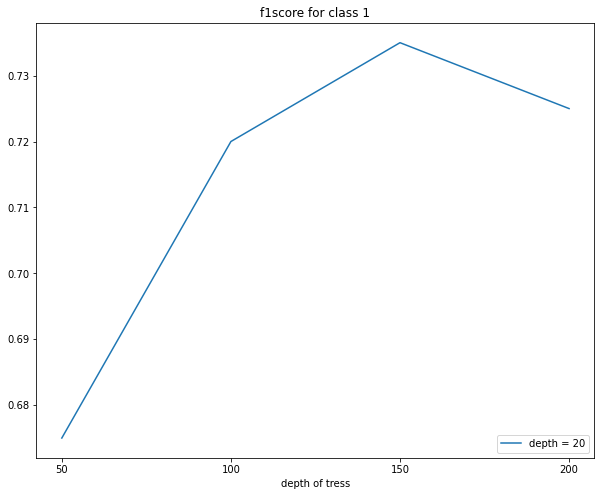

In [0]:
plt.figure(figsize=(10,8))
plt.plot(f1score[0:4],label="depth = 20" )
plt.title("f1score for class 1")
plt.legend(loc="lower right")
plt.xticks(np.arange(4), ('50', '100', '150', '200'))
plt.xlabel("depth of tress")


In [0]:

y = label_binarize(labels, classes=[0, 1, 2, 3, 4])
n_classes = 5


n_samples, n_features = data_pca_subset[0:10000].shape

print(n_samples)
print(n_features)

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_pca_subset[0:10000],y[0:10000], test_size=.2,
                                                    random_state=42)

unique, counts = np.unique( y, return_counts=True)
dict(zip(unique, counts))

In [0]:
classifier = OneVsRestClassifier(RandomForestClassifier(max_depth=20, random_state=42,n_estimators=50))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [0]:
# Compute ROC curve and ROC area for each class
fpr_rfc_155 = dict()
tpr_rfc_155 = dict()
roc_auc_rfc_155 = dict()
for i in range(n_classes):
    fpr_rfc_155[i], tpr_rfc_155[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc_rfc_155[i] = auc(fpr_rfc_155[i], tpr_rfc_155[i])

# Compute micro-average ROC curve and ROC area
fpr_rfc_155["micro"], tpr_rfc_155["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc_rfc_155["micro"] = auc(fpr_rfc_155["micro"], tpr_rfc_155["micro"])

In [0]:
all_fpr_rfc_155 = np.unique(np.concatenate([fpr_rfc_155[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_rfc_155 = np.zeros_like(all_fpr_rfc_155)
for i in range(n_classes):
    mean_tpr_rfc_155 += interp(all_fpr_rfc_155, fpr_rfc_155[i], tpr_rfc_155[i])

# Finally average it and compute AUC
mean_tpr_rfc_155 /= n_classes

fpr_rfc_155["macro"] = all_fpr_rfc_155
tpr_rfc_155["macro"] = mean_tpr_rfc_155
roc_auc_rfc_155["macro"] = auc(fpr_rfc_155["macro"], tpr_rfc_155["macro"])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


In [0]:
classifier = OneVsRestClassifier(RandomForestClassifier(max_depth=20, random_state=42,n_estimators=150))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [0]:
# Compute ROC curve and ROC area for each class
fpr_rfc_150 = dict()
tpr_rfc_150 = dict()
roc_auc_rfc_150 = dict()
for i in range(n_classes):
    fpr_rfc_150[i], tpr_rfc_150[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc_rfc_150[i] = auc(fpr_rfc_150[i], tpr_rfc_150[i])

# Compute micro-average ROC curve and ROC area
fpr_rfc_150["micro"], tpr_rfc_150["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc_rfc_150["micro"] = auc(fpr_rfc_150["micro"], tpr_rfc_150["micro"])

In [0]:
all_fpr_rfc_150 = np.unique(np.concatenate([fpr_rfc_150[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_rfc_150 = np.zeros_like(all_fpr_rfc_150)
for i in range(n_classes):
    mean_tpr_rfc_150 += interp(all_fpr_rfc_150, fpr_rfc_150[i], tpr_rfc_150[i])

# Finally average it and compute AUC
mean_tpr_rfc_150 /= n_classes

fpr_rfc_150["macro"] = all_fpr_rfc_150
tpr_rfc_150["macro"] = mean_tpr_rfc_150
roc_auc_rfc_150["macro"] = auc(fpr_rfc_150["macro"], tpr_rfc_150["macro"])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


In [0]:
classifier = OneVsRestClassifier(RandomForestClassifier(max_depth=20, random_state=42,n_estimators=10))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [0]:
# Compute ROC curve and ROC area for each class
fpr_rfc_10 = dict()
tpr_rfc_10 = dict()
roc_auc_rfc_10 = dict()
for i in range(n_classes):
    fpr_rfc_10[i], tpr_rfc_10[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc_rfc_10[i] = auc(fpr_rfc_10[i], tpr_rfc_10[i])

# Compute micro-average ROC curve and ROC area
fpr_rfc_10["micro"], tpr_rfc_10["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc_rfc_10["micro"] = auc(fpr_rfc_10["micro"], tpr_rfc_10["micro"])

In [0]:
all_fpr_rfc_10 = np.unique(np.concatenate([fpr_rfc_10[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_rfc_10 = np.zeros_like(all_fpr_rfc_10)
for i in range(n_classes):
    mean_tpr_rfc_10 += interp(all_fpr_rfc_10, fpr_rfc_10[i], tpr_rfc_10[i])

# Finally average it and compute AUC
mean_tpr_rfc_10 /= n_classes

fpr_rfc_10["macro"] = all_fpr_rfc_10
tpr_rfc_10["macro"] = mean_tpr_rfc_10
roc_auc_rfc_10["macro"] = auc(fpr_rfc_10["macro"], tpr_rfc_10["macro"])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


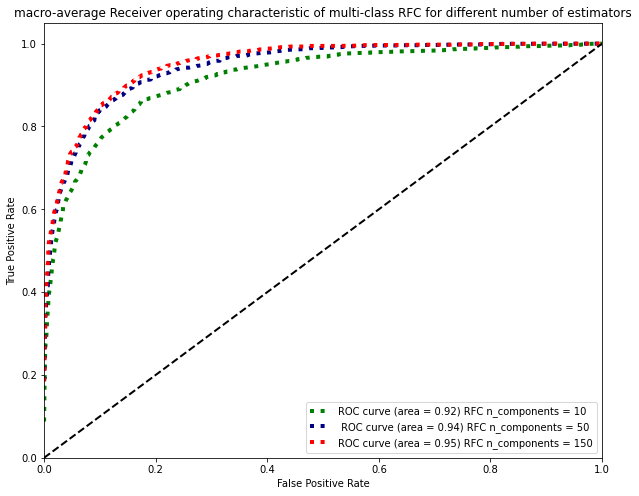

In [0]:
# Ploting only macro ROC curves
plt.figure(figsize=(10,8))

plt.plot(fpr_rfc_10["macro"], tpr_rfc_10["macro"],
         label='ROC curve (area = {0:0.2f}) RFC n_components = 10'
               ''.format(roc_auc_rfc_10["macro"]),
         color='green', linestyle=':', linewidth=4)

plt.plot(fpr_rfc_155["macro"], tpr_rfc_155["macro"],
         label=' ROC curve (area = {0:0.2f}) RFC n_components = 50'
               ''.format(roc_auc_rfc_155["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr_rfc_150["macro"], tpr_rfc_150["macro"],
         label='ROC curve (area = {0:0.2f}) RFC n_components = 150'
               ''.format(roc_auc_rfc_150["macro"]),
         color='red', linestyle=':', linewidth=4)



lw = 2
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('macro-average Receiver operating characteristic of multi-class RFC for different number of estimators')
plt.legend(loc="lower right")
plt.show()

In [0]:
time_start = time.time()
rfc =RandomForestClassifier(max_depth=20, random_state=42,n_estimators=150).fit(data_pca_subset[:,0:40],labels)
time_end = time.time()
print("time taken for training RFC with 40 PCA components {0}".format(time_end -time_start))

time taken for training RFC with 40 PCA components 67.31081986427307


In [0]:
test_pca = test_pca[:,0:40]
time_start = time.time()
predicted = rfc.predict(test_pca)
time_end = time.time()
print(predicted.shape)
print("time taken for predicting output with RFC and 40 PCA components {0}".format(time_end -time_start))

(10000,)
time taken for predicting output with RFC and 40 PCA components 0.3455214500427246


In [0]:
my_submission = pd.DataFrame({'Id': testX.Id, 'Label': predicted})
# you could use any filename. We choose submission here
my_submission.to_csv('RFC submission_20_155_40.csv', index=False)

### **SVM**

In [0]:
c_Values = [0.1,1,10,20]

data_pca_subset = data_pca[:,0:40]

time_start = time.time()
for x in c_Values :
    rbf_svc = svm.SVC(kernel='rbf',C=x)
    scores=cross_val_score(rbf_svc, data_pca_subset[0:5000], labels[0:5000], cv=10)
    print("Kernal = rbf and Validation set mean accuracy score for C= {0} is {1}".format(x,scores.mean()))
time_end = time.time()
print("time taken for getting cross validation score for rbf SVM with 40 PCA components {0}".format(time_end -time_start))

Kernal = rbf and Validation set mean accuracy score for C= 0.1 is 0.7412
Kernal = rbf and Validation set mean accuracy score for C= 1 is 0.8208
Kernal = rbf and Validation set mean accuracy score for C= 10 is 0.8390000000000001
Kernal = rbf and Validation set mean accuracy score for C= 20 is 0.8378
time taken for getting cross validation score for rbf SVM with 40 PCA components 38.98252844810486


In [0]:
c_Values = [0.1,1,10,20]

data_pca_subset = data_pca[:,0:40]
time_start = time.time()
for x in c_Values :
    lin_svc = svm.SVC(kernel='linear',C=x)
    scores=cross_val_score(lin_svc, data_pca_subset[0:5000], labels[0:5000], cv=10)
    print("Kernal = rbf and Validation set mean accuracy score for C= {0} is {1}".format(x,scores.mean()))
time_end = time.time()
print("time taken for getting cross validation score for linear SVM with 40 PCA components {0}".format(time_end -time_start))

Kernal = rbf and Validation set mean accuracy score for C= 0.1 is 0.7091999999999998
Kernal = rbf and Validation set mean accuracy score for C= 1 is 0.7086
Kernal = rbf and Validation set mean accuracy score for C= 10 is 0.7091999999999998
Kernal = rbf and Validation set mean accuracy score for C= 20 is 0.7087999999999999
time taken for getting cross validation score for linear SVM with 40 PCA components 1916.3160934448242


In [0]:
pca = PCA(.8).fit(data_std)
pca_data_new= pca.transform(data_std)
print(pca_data_new.shape)
test_pca_new = pca.transform(test_std)
print(test_pca_new.shape)

(60000, 50)
(10000, 50)


In [0]:
time_start = time.time()
lin_svc = svm.SVC(kernel='rbf',C=20).fit(pca_data_new,labels)
time_end = time.time()
print("time taken for training SVM with 50 PCA components {0}".format(time_end -time_start))

time taken for training SVM with 50 PCA components 119.66347765922546


In [0]:
time_start = time.time()
predicted = lin_svc.predict(test_pca_new)
time_end = time.time()
print(predicted.shape)
print("time taken for predicting output with SVM and 50 PCA components {0}".format(time_end -time_start))

(10000,)
time taken for predicting output with SVM and 50 PCA components 17.000176191329956


In [0]:
my_submission = pd.DataFrame({'Id': testX.Id, 'Label': predicted})
# # you could use any filename. We choose submission here
my_submission.to_csv('pca_svm_submission 20 50 components.csv', index=False)

In [0]:
pca = PCA(.76).fit(data_std)
pca_data_new= pca.transform(data_std)
print(pca_data_new.shape)
test_pca_new = pca.transform(test_std)
print(test_pca_new.shape)

(60000, 35)
(10000, 35)


In [0]:
time_start = time.time()
lin_svc = svm.SVC(kernel='rbf',C=20).fit(pca_data_new,labels)
time_end = time.time()
print("time taken for training SVM with 35 PCA components {0}".format(time_end -time_start))

time taken for training SVM with 35 PCA components 88.02530288696289


In [0]:
time_start = time.time()
predicted = lin_svc.predict(test_pca_new)
time_end = time.time()
print(predicted.shape)
print("time taken for predicting output with SVM and 35 PCA components {0}".format(time_end -time_start))

(10000,)
time taken for predicting output with SVM and 35 PCA components 12.84919786453247


In [0]:
my_submission = pd.DataFrame({'Id': testX.Id, 'Label': predicted})
# # you could use any filename. We choose submission here
my_submission.to_csv('pca_svm_submission 20 35 components.csv', index=False)

In [0]:
time_start = time.time()
lin_svc = svm.SVC(kernel='rbf',C=20).fit(data_pca_subset,labels)
time_end = time.time()
print("time taken for training SVM with 120 PCA components {0}".format(time_end -time_start))

time taken for training SVM with 120 PCA components 329.7202832698822


In [0]:
test_pca = test_pca[:,0:120]
time_start = time.time()
predicted = lin_svc.predict(test_pca)
time_end = time.time()
print(predicted.shape)
print("time taken for predicting output with SVM and 120 PCA components {0}".format(time_end -time_start))

(10000,)
time taken for predicting output with RFC and 120 PCA components 36.33985090255737


In [0]:
my_submission = pd.DataFrame({'Id': testX.Id, 'Label': predicted})
# # you could use any filename. We choose submission here
my_submission.to_csv('pca_svm_submission 20 120 components.csv', index=False)

In [0]:
start = time.process_time()
lin_svm = svm.SVC(kernel='poly',C=31).fit(data_pca, labels)
print(time.process_time() - start)
predicted=lin_svm.predict(test_pca)
print(predicted.shape)

In [0]:
my_submission = pd.DataFrame({'Id': testX.Id, 'Label': predicted})
# # you could use any filename. We choose submission here
my_submission.to_csv('pca_svm_submission new 10.csv', index=False)

## **Trying XGBoost**

In [0]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:


sc = StandardScaler()
data_std = sc.fit_transform(data)
# y = train_df.values[:, 0]

test_std = sc.fit_transform(test)

# print (data_std.shape, labels.shape)
# print (test_std.shape)

X_train, X_valid, y_train, y_valid = train_test_split(data_pca[:,0:50], labels, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_valid.shape, y_valid.shape)

(48000, 50) (48000,)
(12000, 50) (12000,)


In [0]:
param_list = [("eta", 0.08),  ("max_depth",8),("subsample", 0.8), ("colsample_bytree", 0.8), ("objective", "multi:softmax"), ("eval_metric", "merror"), ("alpha", 8), ("lambda", 2), ("num_class", 10)]
n_rounds = 400
early_stopping = 50
    
d_train = xgb.DMatrix(X_train, label=y_train)
d_val = xgb.DMatrix(X_valid, label=y_valid)
eval_list = [(d_train, "train"), (d_val, "validation")]
bst = xgb.train(param_list, d_train, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)

[0]	train-merror:0.200563	validation-merror:0.22025
Multiple eval metrics have been passed: 'validation-merror' will be used for early stopping.

Will train until validation-merror hasn't improved in 50 rounds.
[1]	train-merror:0.175833	validation-merror:0.194333
[2]	train-merror:0.163937	validation-merror:0.184833
[3]	train-merror:0.157937	validation-merror:0.17825
[4]	train-merror:0.152396	validation-merror:0.170167
[5]	train-merror:0.150417	validation-merror:0.16825
[6]	train-merror:0.148625	validation-merror:0.166667
[7]	train-merror:0.147479	validation-merror:0.165417
[8]	train-merror:0.145146	validation-merror:0.165083
[9]	train-merror:0.143354	validation-merror:0.162917
[10]	train-merror:0.142	validation-merror:0.162333
[11]	train-merror:0.141729	validation-merror:0.1615
[12]	train-merror:0.140729	validation-merror:0.160583
[13]	train-merror:0.138917	validation-merror:0.159333
[14]	train-merror:0.13875	validation-merror:0.159167
[15]	train-merror:0.137688	validation-merror:0.158

In [0]:
d_test = xgb.DMatrix(data=test_pca[:,0:50])
y_pred = bst.predict(d_test)

In [0]:
y_pred.shape
y_pred = y_pred.astype(int)
print(y_pred)

[3 4 0 ... 2 2 2]


In [0]:
my_submission = pd.DataFrame({'Id': testX.Id, 'Label': y_pred})
# # # you could use any filename. We choose submission here
my_submission.to_csv('XGBoost_submission_10_10.csv', index=False)

In [0]:
param_list = [("eta", 0.08),  ("max_depth",10),("subsample", 0.8), ("colsample_bytree", 0.8), ("objective", "multi:softmax"), ("eval_metric", "merror"), ("alpha", 8), ("lambda", 2), ("num_class", 10)]
n_rounds = 400
early_stopping = 50
    
d_train = xgb.DMatrix(data_pca_subset[:,0:35], label=labels)
eval_list = [(d_train, "train")]
time_start = time.time()
bst = xgb.train(param_list, d_train, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping,verbose_eval=True)
time_end = time.time()



[0]	train-merror:0.177717
Will train until train-merror hasn't improved in 50 rounds.
[1]	train-merror:0.16405
[2]	train-merror:0.14695
[3]	train-merror:0.1402
[4]	train-merror:0.137233
[5]	train-merror:0.134517
[6]	train-merror:0.132433
[7]	train-merror:0.130233
[8]	train-merror:0.12845
[9]	train-merror:0.12705
[10]	train-merror:0.126133
[11]	train-merror:0.1253
[12]	train-merror:0.124
[13]	train-merror:0.123283
[14]	train-merror:0.1221
[15]	train-merror:0.12125
[16]	train-merror:0.12065
[17]	train-merror:0.1195
[18]	train-merror:0.119083
[19]	train-merror:0.118383
[20]	train-merror:0.117733
[21]	train-merror:0.117017
[22]	train-merror:0.116
[23]	train-merror:0.11575
[24]	train-merror:0.114733
[25]	train-merror:0.113867
[26]	train-merror:0.113267
[27]	train-merror:0.1124
[28]	train-merror:0.111817
[29]	train-merror:0.110783
[30]	train-merror:0.11015
[31]	train-merror:0.10935
[32]	train-merror:0.10915
[33]	train-merror:0.108283
[34]	train-merror:0.107717
[35]	train-merror:0.107067
[36]

In [0]:
print("time taken for training XGBoost with 50 PCA components is {0} ,n_rounds = 400,early_stopping = 50 ".format(time_end -time_start))
d_test = xgb.DMatrix(data=test_pca[:,0:35])
time_start = time.time()
y_pred = bst.predict(d_test)
time_end = time.time()
print("time taken for predicting with XGBoost trained with 50 PCA components {0} ,n_rounds = 400,early_stopping = 50 ".format(time_end -time_start))


time taken for training XGBoost with 50 PCA components is -0.01569843292236328 ,n_rounds = 400,early_stopping = 50 
time taken for predicting with XGBoost trained with 50 PCA components 2.6807658672332764 ,n_rounds = 400,early_stopping = 50 


In [0]:
y_pred.shape
y_pred = y_pred.astype(int)
print(y_pred)

[3 4 0 ... 3 2 2]


In [0]:
my_submission = pd.DataFrame({'Id': testX.Id, 'Label': y_pred})
# # # you could use any filename. We choose submission here
my_submission.to_csv('XGBoost_submission_10_10 35', index=False)